# **Table Of Contents**

*   Import Data
*   Extract And Read The Data
*   Get Information About The Data
*   Data Preparation:
    1. Changing Datatypes
    2. Descriptive Statistics
    3. Find and eliminate the outliers
    4. Drop missing values
*   EDA
*   Correlation Matrix

**Key Questions**
1. What are the most popular pick-up locations across the city for Citi Bike rental?
2. How does the average trip duration vary across different age groups, and over time?
3. Which age group rents the most bikes?
4. Do factors like weather and user age impact the average bike trip duration?

In [1]:
#import library yg digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

**LOAD THE DATASET AND MAKE A COPY OF THE DATASET**

In [3]:
#load csv dataset
bike_data = pd.read_csv("NYCitiBikes-raw data.csv")
bike_raw1 = bike_data.copy()
bike_raw1.head()

,Start Time,Stop Time,Start Station ID,Start Station Name,End Station ID,End Station Name,Bike ID,User Type,Birth Year,Age,Age Groups,Trip Duration,Trip_Duration_in_min,Month,Season,Temperature,Weekday
0,28-12-15 18:39,28-12-15 18:47,3220,5 Corners Library,3203,Hamilton Park,24578,Subscriber,1985,36,35-44,508,8,3,Spring,9,Monday
1,5-12-15 19:16,05-12-15 19:23,3186,Grove St PATH,3214,Essex Light Rail,24479,Subscriber,1941,80,75+,449,7,12,Winter,15,Saturday
2,01-12-16 18:58,1-12-16 19:02,3183,Exchange Place,3214,Essex Light Rail,26247,Subscriber,1941,80,75+,282,5,12,Winter,13,Thursday
3,19-12-15 22:27,19-12-15 22:31,3214,Essex Light Rail,3183,Exchange Place,24599,Subscriber,1941,80,75+,216,4,12,Winter,13,Saturday
4,01-12-15 22:14,01-12-15 22:17,3214,Essex Light Rail,3183,Exchange Place,24500,Subscriber,1941,80,75+,214,4,12,Winter,14,Tuesday


In [4]:
bike_raw1.shape

(146552, 17)

In [5]:
bike_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146552 entries, 0 to 146551
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Start Time            146552 non-null  object
 1   Stop Time             146552 non-null  object
 2   Start Station ID      146552 non-null  int64 
 3   Start Station Name    146552 non-null  object
 4   End Station ID        146552 non-null  int64 
 5   End Station Name      146546 non-null  object
 6   Bike ID               146552 non-null  int64 
 7   User Type             146552 non-null  object
 8   Birth Year            146552 non-null  int64 
 9   Age                   146552 non-null  int64 
 10  Age Groups            146552 non-null  object
 11  Trip Duration         146552 non-null  int64 
 12  Trip_Duration_in_min  146552 non-null  object
 13  Month                 146552 non-null  int64 
 14  Season                146552 non-null  object
 15  Temperature      

Change the data type of **Trip_Duration_in_min** column from **object** data type to **integer (int64)** data type

In [6]:
bike_raw1['Trip_Duration_in_min'] = bike_raw1['Trip_Duration_in_min'].str.replace(',', '').str.strip().astype('int64')
bike_raw1.dtypes

Start Time              object
Stop Time               object
Start Station ID         int64
Start Station Name      object
End Station ID           int64
End Station Name        object
Bike ID                  int64
User Type               object
Birth Year               int64
Age                      int64
Age Groups              object
Trip Duration            int64
Trip_Duration_in_min     int64
Month                    int64
Season                  object
Temperature              int64
Weekday                 object
dtype: object

In [7]:
bike_raw1.describe().round()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
count,146552.0,146552.0,146552.0,146552.0,146552.0,146552.0,146552.0,146552.0,146552.0
mean,3207.0,3203.0,24915.0,1980.0,41.0,1062.0,18.0,7.0,19.0
std,26.0,63.0,751.0,9.0,9.0,68786.0,1146.0,3.0,4.0
min,3183.0,152.0,14552.0,1900.0,21.0,61.0,1.0,1.0,9.0
25%,3186.0,3186.0,24485.0,1975.0,35.0,247.0,4.0,4.0,16.0
50%,3202.0,3199.0,24602.0,1982.0,39.0,384.0,6.0,8.0,19.0
75%,3211.0,3211.0,24711.0,1986.0,46.0,652.0,11.0,10.0,22.0
max,3281.0,3442.0,29296.0,2000.0,121.0,20260211.0,337670.0,12.0,30.0


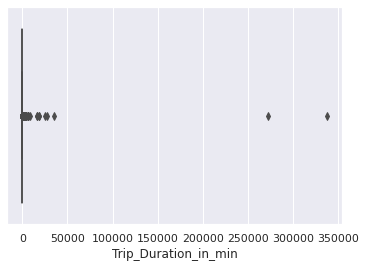

In [8]:
sns.boxplot(x=bike_raw1['Trip_Duration_in_min'])

It can be seen that in the trip_duration_in_min column has a maximum value 337670 minutes, which means 234 days and also in the Age column there is a maximum age of 121 years for bicycle renters. These can be judged as outliers, so they need to be eliminated

Eliminate the outliers in the **Trip_Duration_in_min** column use **quantile()** upper limit function 

In [11]:
batas_atas_durasi = bike_raw1['Trip_Duration_in_min'].quantile(0.99991)                                                       
batas_atas_durasi

5946.970340000407

In [12]:
bike_raw1 = bike_raw1[bike_raw1['Trip_Duration_in_min'] < batas_atas_durasi]
bike_raw1.shape

(146538, 17)

In [13]:
bike_raw1['Trip_Duration_in_min'].max()

5887

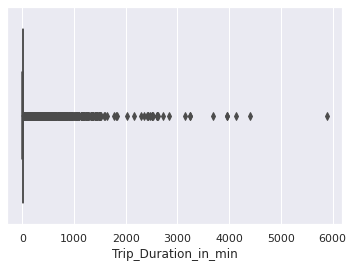

In [14]:
sns.boxplot(x=bike_raw1['Trip_Duration_in_min'])

Eliminate the outliers in the **Age** column use **quantile()** upper limit function 

In [15]:
bike_raw1['Age'].max()

121

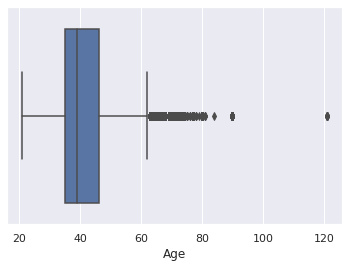

In [16]:
sns.boxplot(x=bike_raw1['Age'])

In [17]:
batas_atas_usia = bike_raw1['Age'].quantile(0.99994)
batas_atas_usia

96.44117999990704

In [19]:
bike_raw = bike_raw1[bike_raw1['Age'] < batas_atas_usia]
bike_raw['Age'].max()
bike_raw.shape

(146529, 17)

In [20]:
bike_raw.describe().round()

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
count,146529.0,146529.0,146529.0,146529.0,146529.0,146529.0,146529.0,146529.0,146529.0
mean,3207.0,3203.0,24915.0,1980.0,41.0,735.0,12.0,7.0,19.0
std,26.0,63.0,751.0,9.0,9.0,3588.0,60.0,3.0,4.0
min,3183.0,152.0,14552.0,1931.0,21.0,61.0,1.0,1.0,9.0
25%,3186.0,3186.0,24485.0,1975.0,35.0,247.0,4.0,4.0,16.0
50%,3202.0,3199.0,24602.0,1982.0,39.0,384.0,6.0,8.0,19.0
75%,3211.0,3211.0,24711.0,1986.0,46.0,652.0,11.0,10.0,22.0
max,3281.0,3426.0,29296.0,2000.0,90.0,353192.0,5887.0,12.0,30.0


Drop the data that has null value

In [21]:
print(bike_raw.isnull().sum())

Start Time              0
Stop Time               0
Start Station ID        0
Start Station Name      0
End Station ID          0
End Station Name        4
Bike ID                 0
User Type               0
Birth Year              0
Age                     0
Age Groups              0
Trip Duration           0
Trip_Duration_in_min    0
Month                   0
Season                  0
Temperature             0
Weekday                 0
dtype: int64


In [22]:
bike = bike_raw.dropna()
bike.count()

Start Time              146525
Stop Time               146525
Start Station ID        146525
Start Station Name      146525
End Station ID          146525
End Station Name        146525
Bike ID                 146525
User Type               146525
Birth Year              146525
Age                     146525
Age Groups              146525
Trip Duration           146525
Trip_Duration_in_min    146525
Month                   146525
Season                  146525
Temperature             146525
Weekday                 146525
dtype: int64

**TUGAS**

***Lokasi Pick-Up Station Paling Populer***



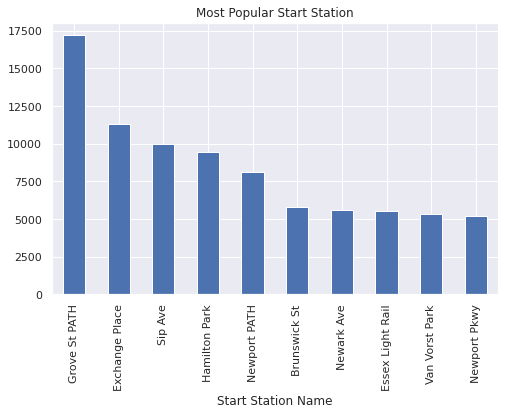

In [23]:
bike.value_counts("Start Station Name").nlargest(10).plot(kind='bar',figsize=(8,5),title="Most Popular Start Station")

5 most popular pick-up locations are Grove St PATH, Exchange Place, Sip Ave, Hamilton Park and Brunswick St

***How does the average trip duration vary across different age groups, and over time?***

In [24]:
bike_grup1 = bike[['Trip_Duration_in_min', 'Age Groups']].groupby(['Age Groups']).mean().unstack().round()
bike_grup1

                      Age Groups
Trip_Duration_in_min  18-24         14.0
                      25-34         10.0
                      35-44         14.0
                      45-54         10.0
                      55-64         12.0
                      65-74         12.0
                      75+           21.0
dtype: float64

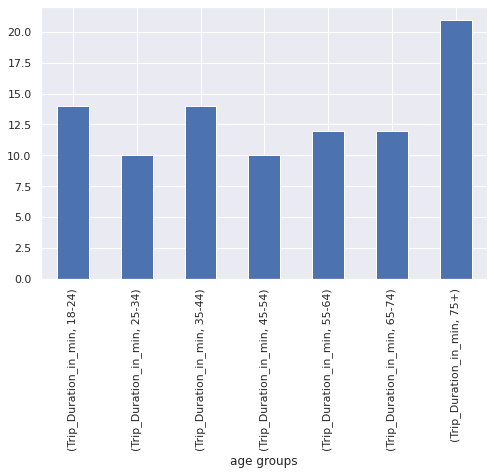

In [25]:
bike_grup1.plot(kind='bar', figsize=(8,5))
plt.xlabel("age groups")
plt.show()

It can be concluded that the age group of 75+ years rents a bicycle with the longest trip duration, with an average of 21 minutes.

***Which age group rents the most bikes?***

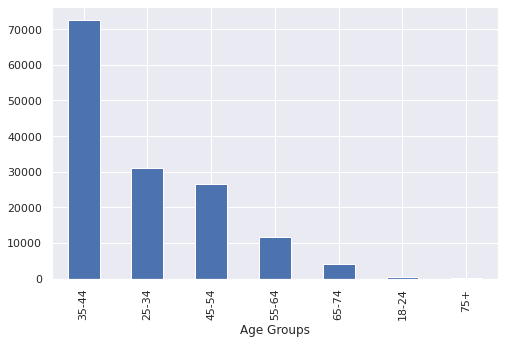

In [26]:
bike_year = bike.value_counts('Age Groups')
bike_year.plot(kind='bar', figsize=(8,5))
plt.show()

most bicycle renters are in the 35-44 year age group

***Do factors like weather and age impact the average bike trip duration?***


In [27]:
corr_matrix = round(bike.corr(), 2)
corr_matrix

,Start Station ID,End Station ID,Bike ID,Birth Year,Age,Trip Duration,Trip_Duration_in_min,Month,Temperature
Start Station ID,1.00,-0.03,0.14,-0.00,0.00,-0.02,-0.02,0.02,-0.06
End Station ID,-0.03,1.00,0.05,0.00,-0.00,-0.02,-0.02,0.01,-0.02
Bike ID,0.14,0.05,1.00,0.01,-0.01,-0.01,-0.01,0.04,-0.04
Birth Year,-0.00,0.00,0.01,1.00,-1.00,0.01,0.01,0.00,0.02
Age,0.00,-0.00,-0.01,-1.00,1.00,-0.01,-0.01,-0.00,-0.02
Trip Duration,-0.02,-0.02,-0.01,0.01,-0.01,1.00,1.00,0.01,0.03
Trip_Duration_in_min,-0.02,-0.02,-0.01,0.01,-0.01,1.00,1.00,0.01,0.03
Month,0.02,0.01,0.04,0.00,-0.00,0.01,0.01,1.00,0.34
Temperature,-0.06,-0.02,-0.04,0.02,-0.02,0.03,0.03,0.34,1.00


From the correlation plot above, it is found that there is no feature that directly has a high enough correlation value to Trip Duration in min. However, temperature has a fairly high correlation to Trip Duration in min among other factors, namely 0.3 out of a scale of 1. While Age has no effect on Trip Duration in min.